In [1]:
import bs4 as bs
import requests
import nltk
import spacy
from spacy.matcher import PhraseMatcher
from spacy import displacy
from spacy.lang.pt.stop_words import STOP_WORDS
from IPython.core.display import HTML
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Introdução

Para iniciar, devemos primeiro instaciar um objeto Spacy passando como parâmetro a linguagem que iremos utilizar.

In [2]:
pln = spacy.load('pt_core_news_sm')

Após isso, passamos como parâmetro ao objeto criado anteriormente uma string para que a utilize e análise.

In [3]:
doc = pln('A bola irá rolar até que algo pare ela em algum momento')

Aqui realizamos uma análise do texto, obtendo uma relação de: palavra, tipo e radical.

In [4]:
for token in doc:
    print(f'{token.text} | {token.pos_} | {token.lemma_}')

A | DET | o
bola | NOUN | bola
irá | AUX | ir
rolar | VERB | rolar
até | ADV | até
que | SCONJ | que
algo | PRON | algo
pare | VERB | pare
ela | PRON | ele
em | ADP | em
algum | DET | algum
momento | NOUN | momento


# Pesquisa de uma palavra a partir de um texto

## Web-Scraping para obtenção do texto que iremos utilizar

In [5]:
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
dados = requests.get('https://tecnoblog.net/responde/o-que-e-inteligencia-artificial/', 
                    headers=header)
dados = dados.text
dados_html = bs.BeautifulSoup(dados)

paragrafos = dados_html.find_all('p')
conteudo = ' '.join([p.text.replace('\n', '').replace('\xa0', ' ') 
                     for p in paragrafos]).lower()

## Buscar uma palavra em específico no texto

In [6]:
def on_match(matcher, doc, id, matches):
    '''
    Essa função será usada como callback sempre que for encontrado a pesquisa
    no texto. Todos os parâmetros são obrigatórios para o uso do mesmo.
    '''
    display(HTML(f'<p>... {doc[matches[id][1] - 25: matches[id][2] + 25]} ...<p>'.replace(PESQUISA, 
                                                                                  f'<mark>{PESQUISA}</mark>')))

In [15]:
#PESQUISA = input('Pesquisa: ').lower()
PESQUISA = 'inteligência'
# Palavra que será buscada.

token_pesquisa = pln(PESQUISA)
doc = pln(conteudo)
# Instância do objeto com o Token (palavra) que será buscada e do conteudo.

matcher = PhraseMatcher(pln.vocab)
# PhraseMatcher é o objeto responsavel por fazer a busca de determinadas palavras no texto.
# pln.vocab contém o vocabulario português

matcher.add('SEARCH', docs=[token_pesquisa], on_match=on_match)
# Adiciona uma palavra para ser buscada no texto

display(HTML(f'<h1>{PESQUISA.upper()}</h1>'))

matches = matcher(doc)

# NER - Named-Entity Recognition
- Encontrar e classificar entidades do texto (pessoa, localização, empresa, número, etc)

In [8]:
displacy.render(doc, style='ent', jupyter=True)

# Nuvem de Palavras e Stop Words

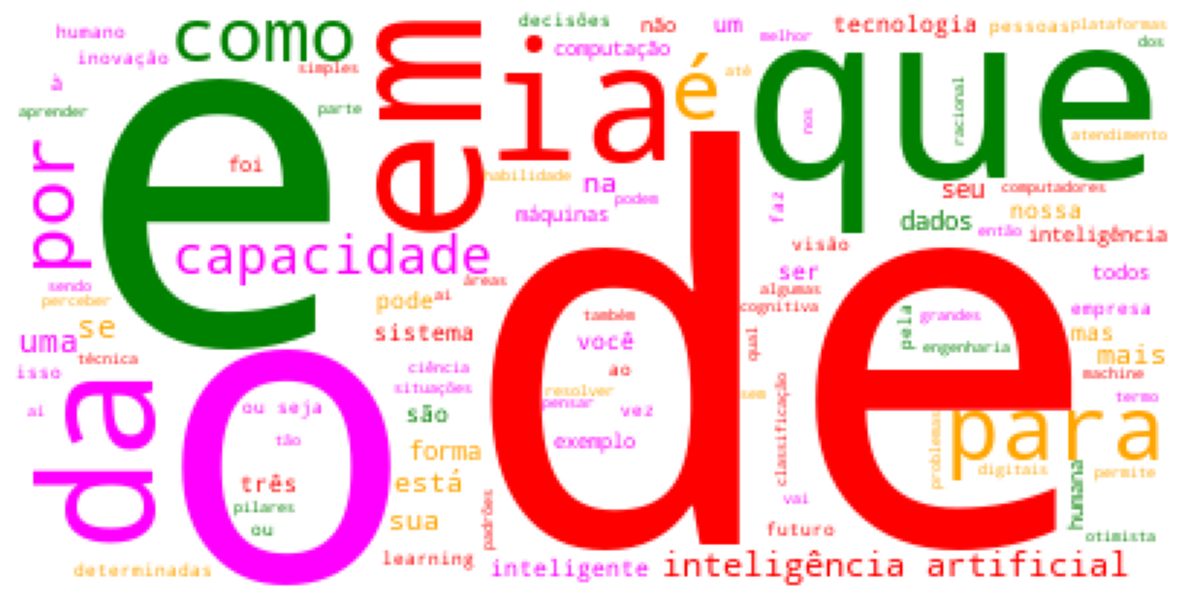

In [9]:
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])
cloud = WordCloud(background_color='white', max_words=100, colormap=color_map)

cloud = cloud.generate(conteudo)
plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

A nuvem de palavras ficou ineficaz, visto que a maioria das palavras que mais aparecem são stop-words, logo, se faz necessário a remoção dessas palavras antes da criação desse gráfico, para isso, iremos fazer:

In [10]:
sem_stop = [token.text for token in doc 
            if not pln.vocab[token.text].is_stop]

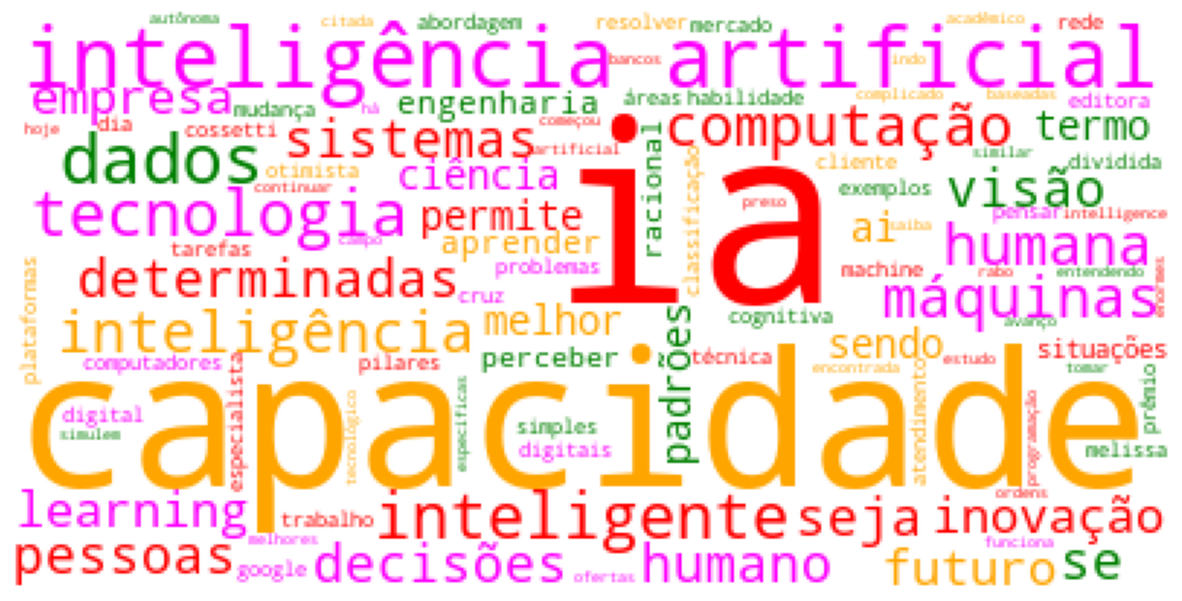

In [11]:
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()